In [1]:
import pandas as pd
from typing import Dict


In [2]:
img_df = pd.read_csv("/Users/adityajoshi/facebook_analysis/Train/Image/oxford.csv")
profile_df = pd.read_csv("/Users/adityajoshi/facebook_analysis/Train/Profile/Profile.csv")

In [3]:
img_df.head(n=1)

,userId,faceID,faceRectangle_width,faceRectangle_height,faceRectangle_left,faceRectangle_top,pupilLeft_x,pupilLeft_y,pupilRight_x,pupilRight_y,...,underLipTop_x,underLipTop_y,underLipBottom_x,underLipBottom_y,facialHair_mustache,facialHair_beard,facialHair_sideburns,headPose_roll,headPose_yaw,headPose_pitch
0,0000e06e07496624211632e8e264126c,f7e072db-8532-4686-9074-27e83fee5e94,61,61,15,49,32.7,64.7,59.7,65.0,...,41.8,94.3,41.9,98.6,0.0,0.0,0.0,3.9,-22.4,0.0


In [4]:
def extract_gender(df: pd.Series) -> int:
    return profile_df[profile_df["userid"] == df['userId']]["gender"].item()

In [5]:
genders = [extract_gender(row[1]) for row in img_df.iterrows()]

/Users/adityajoshi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `item` has been deprecated and will be removed in a future version
  


In [6]:
img_df = img_df.assign(gender=genders)

In [7]:
features, labels = img_df.drop(["userId", "faceID", "gender"], axis=1), img_df["gender"]

In [8]:
from sklearn.model_selection import validation_curve

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Data = namedtuple("Data", ['X', 'y'])
NAVY = "#001f3f"


def experiment(estimator, preprocessed_train, hyper_parameter_name, hyper_parameter_values, x_axis_label):
    train_scores, valid_scores = validation_curve(estimator,
                                                  preprocessed_train.X,
                                                  preprocessed_train.y,
                                                  hyper_parameter_name,
                                                  hyper_parameter_values,
                                                  cv=4,
                                                  verbose=3,
                                                  n_jobs=3,
                                                  scoring="accuracy")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)
    plt.title("Validation Curve with xgboost for gender classification")
    plt.xlabel(x_axis_label)
    plt.ylabel("Accuracy")
    lw = 2

    plt.plot(hyper_parameter_values, train_scores_mean, label="Training Accuracy",
                 color="darkorange", lw=lw)
    plt.fill_between(hyper_parameter_values, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(hyper_parameter_values, valid_scores_mean, label="Cross-Validation Accuracy",
                 color=NAVY, lw=lw)
    plt.fill_between(hyper_parameter_values, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.2,
                     color=NAVY, lw=lw)
    print("Training Accuracy:", train_scores)
    print("Valid Accuracy:", valid_scores)
    plt.legend(loc="best")
    plt.show()

In [ ]:
training_data = Data(X=features.values, y=labels.values)

In [ ]:
# Experiment 1: CV on Number of Boosting Stages.
from xgboost import XGBClassifier
experiment(XGBClassifier(max_depth=3, learning_rate=0.1),
           training_data,
           "n_estimators",
           [10, 20, 50, 100, 150, 200],
           "Number of Estimators")

In [ ]:
experiment(XGBClassifier(n_estimators=50),
           training_data,
           "max_depth",
           [2, 3, 5],
           "Max Depth")

In [ ]:
experiment(XGBClassifier(n_estimators=50, max_depth=3),
           training_data,
           "learning_rate",
           [0.1, 0.01, 0.001],
           "Learning Rate")

In [41]:
from sklearn.model_selection import train_test_split
from sklearn_evaluation import plot
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 5, 3

In [42]:
X_train, X_test, y_train, y_test = train_test_split(features.values, labels.values, test_size=0.30)
clf = GradientBoostingClassifier(n_estimators=25, max_depth=3)

In [43]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

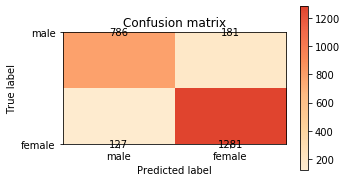

In [44]:
ax = plot.confusion_matrix(y_test, y_pred, target_names=["male", "female"])
plt.subplot(ax)

In [45]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n         0.0       0.86      0.81      0.84       967\n         1.0       0.88      0.91      0.89      1408\n\n    accuracy                           0.87      2375\n   macro avg       0.87      0.86      0.86      2375\nweighted avg       0.87      0.87      0.87      2375\n'